## Modelling with **empymod** to design a CSEM survey for monitoring an Aquifer Thermal Energy Storage (ATES) site 

We will use the expected subsurface stratigraphy and related electrical resistivities at the ATES site of TU Delft. 

For more information on the project, have a look at https://www.push-it-thermalstorage.eu/pilots/delft .

### Adjust the input values to empymod based on your survey setup!
- **Setup 1:** Horizontal bipole source combined with 300 m long horizontal receiver line recording horizontal electric field component.
- **Setup 2:** Horizontal bipole source combined with 300 m long vertical receiver line (in borehole) recording vertical electric field component.
- **Setup 3:** Vertical bipole source combined with 300 m long vertical receiver line (in borehole) recording vertical electric field component.

### Tasks
- Compare layered background and target (stored water 10 °C warmer, ...,  and 50 °C warmer than base aquifer) responses for varying source locations and source lengths.
- Find optimal source location (and length) w.r.t. receiver line for your setup. 
- Collect and compare your results with the other setups worked on by your group members.

### Questions
- Where would you place your source and receivers? Why?
- Which survey setup would you use to detect and monitor the hot water in the aquifer layer? Why?

In [1]:
# Uncomment on Google Colab
# %pip install empymod matplotlib ipympl
# %pip install ipywidgets # for the interactive figure

In [2]:
import empymod
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# For interactive figures; comment this out on Google Colab if it doesn't work.
%matplotlib widget

In [3]:
# See https://empymod.emsig.xyz for documentation, or find the
# help of each function with (uncomment it and run the cell):
# empymod.bipole?

## Temperature (T) - resistivity (ρ) relationship

ρ(Thot) = ρ(Tcold) [1 + 0.025(Thot − Tcold)]^(−1)

The aquifer layer has a resistivity of 13.8 Ohmm at 14 °C.

Calculate the aquifer resistivities after injecting hot water (target). The water can be up to 60 °C warmer than the base aquifer.



In [4]:
# Calculate your target resistivities here:


## Survey Setup

We define a frequency-domain survey to test different setups of source and receiver locations.

Choose the options for `source` and `receivers_1` that suit your survey setup by (un)commenting.

Test different source locations and lengths to find a source placement that gives you a response from which you can clearly distinguish the target layer from the base model.

In [5]:
# source: x0, x1, y0, y1, z0, z1
source = [-150, -160, 0, 0, 0, 0]   # x-directed bipole, adjust x-location and length
#source = [-100, -100, 0, 0, 0, 100] # z-directed bipole, adjust x-location and length in z-direction

# Source frequency
frequency_1 = 1

# Receiver offsets
offsets_1 = np.linspace(1, 300, 300) # 300 m long receiver line

# receiver-array: x, y, z, azimuth, dip
receivers_1 = (offsets_1, offsets_1*0, 0, 0, 0) # x-directed, Ex response
#receivers_1 = (offsets_1*0, offsets_1*0, offsets_1, 0, 90) # z-directed, Ez response

## Layered subsurface model

Next, we define the resistivity models (base & target):

- **base:** layered model before hot water injection
- **target:** with hot water in aquifer layer

You can define and calculate as many target models corresponding to different aquifer temperatures, as you wish.

In [6]:
# Layer boundaries in m
depth = [0, -45, -80, -123, -184] # 5-layer model

# Layer resistivities in Ohmm
res_target = 13.1
resistivities_base = [2e14, 52.0, 38.0, 26.0, 29.5, 17.5] # base incl. air
resistivities_target = [2e14, 52.0, 38.0, 26.0, res_target, 17.5] # adjust target resistivity (second last), now: aquifer +50 °Celsius

# define the input that stays the same for all models
inp = {
    'src': source,
    'rec': receivers_1,
    'depth': depth,
    'freqtime': frequency_1,
    'srcpts': 5,  # Models the finite-length source as 5 point sources with Gaussian Quadrature
    'htarg': {'pts_per_dec': -1},  # Faster computation
    'verb': 1,
}

## Computation

And finally we compute the electromagnetic responses at receiver locations:

In [20]:
resp_E_base = empymod.bipole(res=resistivities_base, **inp)
resp_E_target = empymod.bipole(res=resistivities_target, **inp)

## Plotting

Let’s plot the resulting responses in terms of amplitudes and phases and their differences:

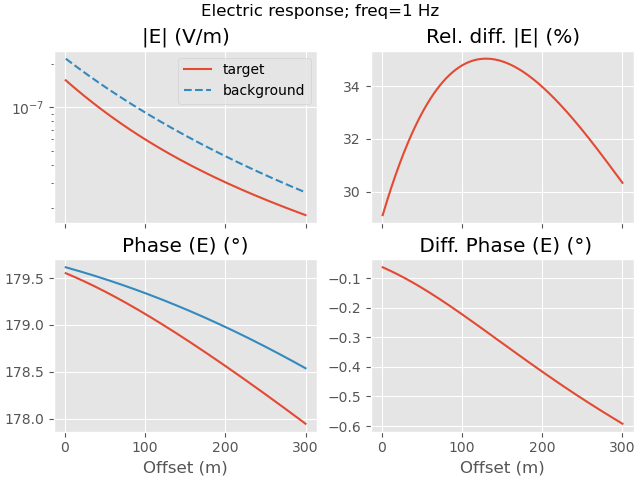

In [21]:
fig1, ((ax11, ax12), (ax13, ax14)) = plt.subplots(2, 2, sharex=True, constrained_layout=True)

fig1.suptitle(f'Electric response; freq={frequency_1} Hz')

ax11.set_title('|E| (V/m)')
ax11.semilogy(offsets_1, resp_E_target.amp(), label='target')
ax11.semilogy(offsets_1, resp_E_base.amp(), '--', label='background')
ax11.legend()

ax12.set_title('Rel. diff. |E| (%)')
rel_diff_amp = 100 * (abs(resp_E_target.amp()-resp_E_base.amp()) / abs(resp_E_base.amp()))
ax12.plot(offsets_1, rel_diff_amp)

ax13.set_title('Phase (E) (°)')
ax13.plot(offsets_1, resp_E_target.pha(deg=True))
ax13.plot(offsets_1, resp_E_base.pha(deg=True))

ax14.set_title(' Diff. Phase (E) (°)')
ax14.plot(offsets_1, resp_E_target.pha(deg=True) - resp_E_base.pha(deg=True))

for ax in [ax13, ax14]:
    ax.set_xlabel('Offset (m)') # for plotting Ex at a horizontal receiver line
    #ax.set_xlabel('Depth (m)') # for plotting Ez in borehole

### Optional tasks

- Plot the resistivity profile of your background and target model.
- Compare different frequencies.
- Plot the results on a color-coded section for different source offsets.
- Come up with your own survey layout idea.

### Interactive widget

In [9]:
import ipywidgets as widgets
from ipywidgets import interact

interactive(children=(FloatSlider(value=13.1, description='tres', max=29.5, min=1.0), Output()), _dom_classes=…

<function __main__.f(tres)>

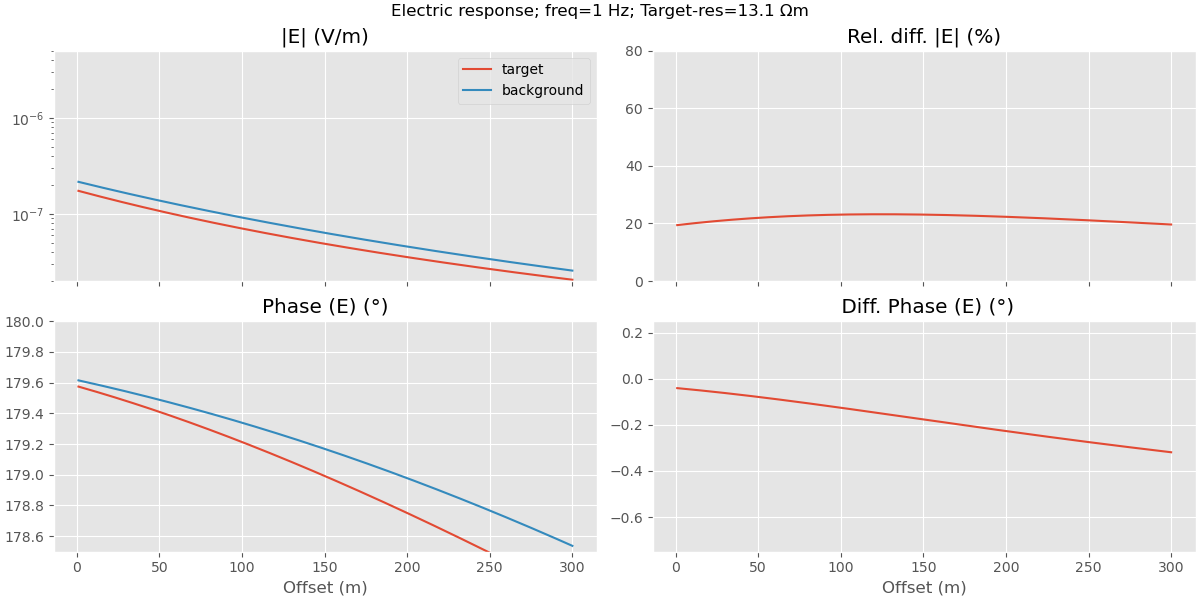

In [10]:
fig1, ((ax11, ax12), (ax13, ax14)) = plt.subplots(2, 2, figsize=(12, 6), sharex=True, constrained_layout=True)

fig1.suptitle(f'Electric response; freq={frequency_1} Hz; Target-res={res_target} Ωm')

ax11.set_title('|E| (V/m)')
ax11.semilogy(offsets_1, resp_E_target.amp(), label='target')
ax11.semilogy(offsets_1, resp_E_base.amp(), label='background')
ax11.legend()
ax11.set_ylim(2e-8, 5e-6)

ax12.set_title('Rel. diff. |E| (%)')
rel_diff_amp = 100 * (abs(resp_E_target.amp()-resp_E_base.amp()) / abs(resp_E_base.amp()))
ax12.plot(offsets_1, rel_diff_amp)
ax12.set_ylim(-0.05, 80)

ax13.set_title('Phase (E) (°)')
ax13.plot(offsets_1, resp_E_target.pha(deg=True))
ax13.plot(offsets_1, resp_E_base.pha(deg=True))
ax13.set_ylim(178.5, 180)

ax14.set_title(' Diff. Phase (E) (°)')
ax14.plot(offsets_1, resp_E_target.pha(deg=True) - resp_E_base.pha(deg=True))
ax14.set_ylim(-0.75, 0.25)

for ax in [ax13, ax14]:
    ax.set_xlabel('Offset (m)') # for plotting Ex at a horizontal receiver line
    #ax.set_xlabel('Depth (m)') # for plotting Ez in borehole


def f(tres):
    fig1.suptitle(f'Electric response; freq={frequency_1} Hz; Target-res={tres:4.1f} Ωm')

    resistivities_target[4] = tres
    resp_E_target = empymod.bipole(res=resistivities_target, **inp)
    rel_diff_amp = 100 * (abs(resp_E_target.amp()-resp_E_base.amp()) / abs(resp_E_base.amp()))

    ax11.lines[0].set_ydata(resp_E_target.amp())
    ax12.lines[0].set_ydata(rel_diff_amp)
    ax13.lines[0].set_ydata(resp_E_target.pha(deg=True))
    ax14.lines[0].set_ydata(resp_E_target.pha(deg=True) - resp_E_base.pha(deg=True))

interact(f, tres=widgets.FloatSlider(min=1, max=29.5, step=0.1, value=res_target))

In [11]:
empymod.Report()

--------------------------------------------------------------------------------
  Date: Mon Jun 30 13:25:45 2025 CEST

                OS : Darwin (macOS 15.5)
            CPU(s) : 14
           Machine : arm64
      Architecture : 64bit
               RAM : 48.0 GiB
       Environment : Jupyter
       File system : apfs

  Python 3.13.3 | packaged by conda-forge | (main, Apr 14 2025, 20:44:30)
  [Clang 18.1.8 ]

             numpy : 2.2.5
             scipy : 1.15.2
             numba : 0.61.2
           empymod : 2.5.1
            libdlf : 0.3.0
           IPython : 9.2.0
        matplotlib : 3.10.1
--------------------------------------------------------------------------------